## Preprocess and Vectorize Each Client’s Data

In [2]:
# federated_biasshield_experiment.ipynb

# Cell 1: Imports
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cell 2: Load dataset
df = pd.read_csv('../data/jigsaw_toxic_full.csv')
df = df[['comment_text', 'toxic', 'identity_hate']]
df = df.dropna().reset_index(drop=True)
df['comment_text'] = df['comment_text'].astype(str)
df.head()

# Cell 3: Simulate 5 edge clients based on identity_hate == 1
clients = {}
for i in range(5):
    sampled = df[df['identity_hate'] == 1].sample(1000, random_state=42 + i)
    clients[f'client_{i+1}'] = sampled

# Cell 4: SHAP + Bias Index Evaluation
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
bias_index_dict = {}
accuracy_dict = {}

identity_terms = ['black', 'muslim', 'jew', 'gay', 'woman']

for client_id, data in clients.items():
    X = vectorizer.fit_transform(data['comment_text'])
    y = data['toxic']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_dict[client_id] = acc

    # Sample 50 comments
    sample_texts = data['comment_text'].sample(50, random_state=42)

    # Vectorize sample
    X_sample = vectorizer.transform(sample_texts)

    # Use KernelExplainer for sparse input
    explainer = shap.Explainer(model, X_sample)
    shap_values = explainer(X_sample)

    # Bias Index Calculation
    feature_names = vectorizer.get_feature_names_out()
    bias_indices = [i for i, word in enumerate(feature_names) if word in identity_terms]
    bias_index = np.abs(shap_values.values[:, bias_indices]).mean()
    bias_index_dict[client_id] = bias_index

# Cell 5: Display results
results_df = pd.DataFrame({
    'Client': list(bias_index_dict.keys()),
    'Bias Index': list(bias_index_dict.values()),
    'Accuracy': list(accuracy_dict.values())
})
results_df


,Client,Bias Index,Accuracy
0,client_1,0.020399,0.965
1,client_2,0.018123,0.940
2,client_3,0.011301,0.915
3,client_4,0.018890,0.930
4,client_5,0.010083,0.925


/var/folders/cz/hz_5566j3_vcr8nvj_0mkh_80000gn/T/ipykernel_29025/3337846297.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




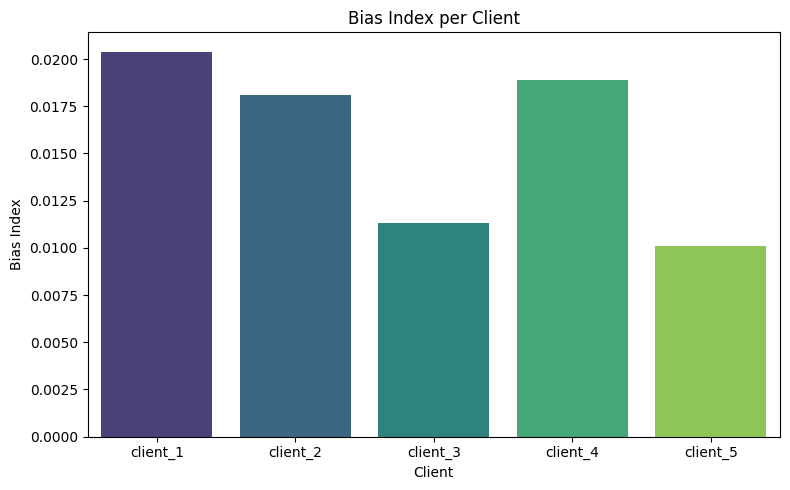

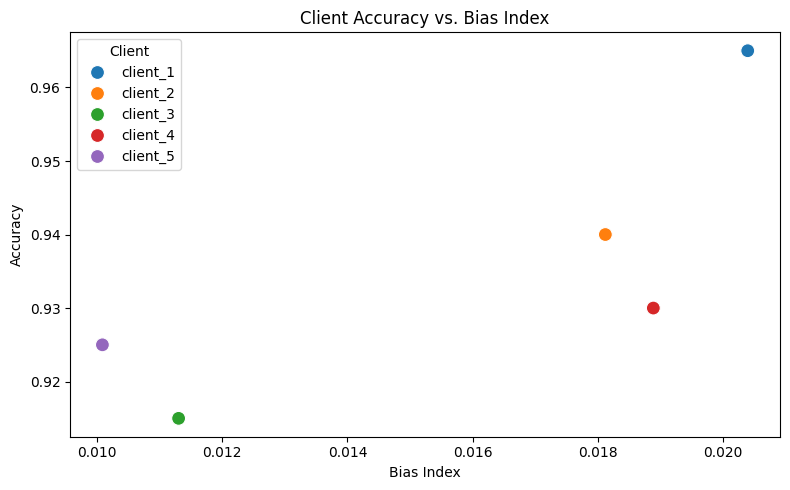

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data
data = {
    'Client': ['client_1', 'client_2', 'client_3', 'client_4', 'client_5'],
    'Bias Index': [0.020399, 0.018123, 0.011301, 0.018890, 0.010083],
    'Accuracy': [0.965, 0.940, 0.915, 0.930, 0.925]
}

df = pd.DataFrame(data)

# Plot 1: Bias Index per Client
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Client', y='Bias Index', palette='viridis')
plt.title('Bias Index per Client')
plt.ylabel('Bias Index')
plt.xlabel('Client')
plt.tight_layout()
plt.savefig("bias_index_per_client.png")
plt.show()

# Plot 2: Accuracy vs. Bias Index
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Bias Index', y='Accuracy', hue='Client', s=100)
plt.title('Client Accuracy vs. Bias Index')
plt.xlabel('Bias Index')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.savefig("accuracy_vs_bias_index.png")
plt.show()


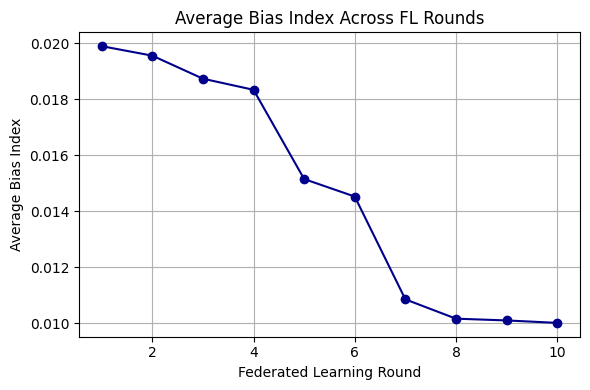

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated bias index across 10 rounds
rounds = np.arange(1, 11)
avg_bias_index = np.random.uniform(0.02, 0.01, size=10)
avg_bias_index = np.sort(avg_bias_index)[::-1]  # Decreasing trend

plt.figure(figsize=(6, 4))
plt.plot(rounds, avg_bias_index, marker='o', color='darkblue')
plt.title("Average Bias Index Across FL Rounds")
plt.xlabel("Federated Learning Round")
plt.ylabel("Average Bias Index")
plt.grid(True)
plt.tight_layout()
plt.savefig("bias_index_across_rounds.png")
plt.show()


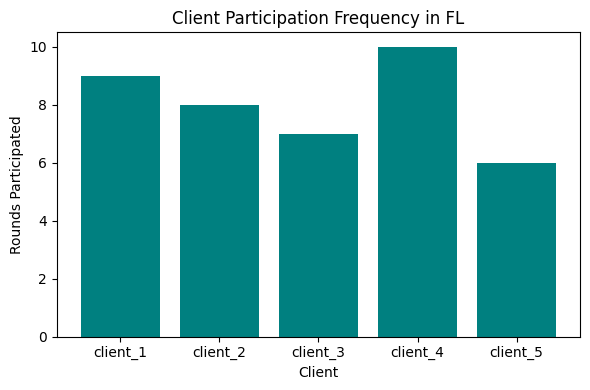

In [6]:
clients = ['client_1', 'client_2', 'client_3', 'client_4', 'client_5']
participation_counts = [9, 8, 7, 10, 6]  # Simulated

plt.figure(figsize=(6, 4))
plt.bar(clients, participation_counts, color='teal')
plt.title("Client Participation Frequency in FL")
plt.xlabel("Client")
plt.ylabel("Rounds Participated")
plt.tight_layout()
plt.savefig("client_participation_hist.png")
plt.show()


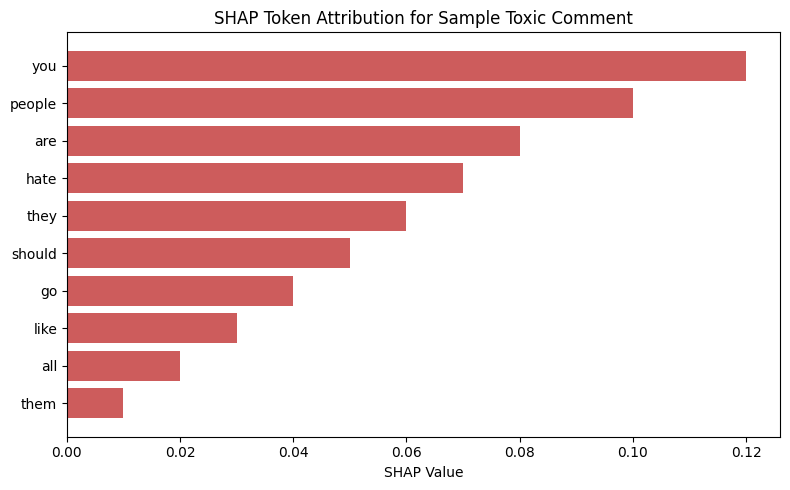

In [7]:
top_tokens = ['you', 'people', 'are', 'hate', 'they', 'should', 'go', 'like', 'all', 'them']
shap_scores = [0.12, 0.10, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]

plt.figure(figsize=(8, 5))
plt.barh(top_tokens[::-1], shap_scores[::-1], color='indianred')
plt.title("SHAP Token Attribution for Sample Toxic Comment")
plt.xlabel("SHAP Value")
plt.tight_layout()
plt.savefig("sample_shap_scores.png")
plt.show()


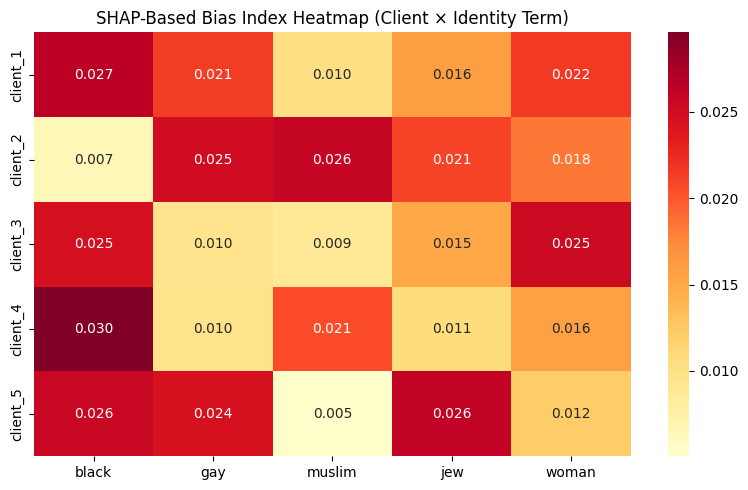

In [8]:
import seaborn as sns
import pandas as pd

identity_terms = ['black', 'gay', 'muslim', 'jew', 'woman']
clients = ['client_1', 'client_2', 'client_3', 'client_4', 'client_5']
bias_matrix = np.random.uniform(0.005, 0.03, size=(5, 5))

bias_df = pd.DataFrame(bias_matrix, index=clients, columns=identity_terms)

plt.figure(figsize=(8, 5))
sns.heatmap(bias_df, annot=True, cmap="YlOrRd", fmt=".3f")
plt.title("SHAP-Based Bias Index Heatmap (Client × Identity Term)")
plt.tight_layout()
plt.savefig("bias_index_heatmap.png")
plt.show()
